<a href="https://colab.research.google.com/github/ErrorNginx/My-project-google-colab/blob/development/Ramadhan%202019/Ramadhan_2019.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

import datetime
import random
from matplotlib.sankey import Sankey

In [ ]:
import seaborn as sns

In [ ]:
plt.rcParams['figure.figsize'] = (3,3.5) 
plt.rcParams["figure.dpi"] = 80 

In [ ]:
lokasi = pd.read_csv('catatan_lokasi.csv')
profil = pd.read_csv('data_profil.csv')

In [ ]:
lokasi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600 entries, 0 to 1599
Data columns (total 3 columns):
id                1600 non-null int64
tanggal           1600 non-null object
lokasi_dominan    1600 non-null object
dtypes: int64(1), object(2)
memory usage: 37.6+ KB


In [ ]:
profil.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
id               100 non-null int64
jenis_kelamin    100 non-null object
divisi           100 non-null object
umur             100 non-null int64
dtypes: int64(2), object(2)
memory usage: 3.2+ KB


In [ ]:
df = pd.merge(lokasi, profil, on='id')

In [ ]:
df['tanggal']  = df['tanggal'].apply(lambda x : datetime.datetime.strptime(str(x), '%d/%m/%y'))

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1600 entries, 0 to 1599
Data columns (total 6 columns):
id                1600 non-null int64
tanggal           1600 non-null datetime64[ns]
lokasi_dominan    1600 non-null object
jenis_kelamin     1600 non-null object
divisi            1600 non-null object
umur              1600 non-null int64
dtypes: datetime64[ns](1), int64(2), object(3)
memory usage: 87.5+ KB


Pertanyaan :
1. mudik tanggal berapa
2. kota/ pulau tujuan
3. gender yang pulang kampung
4. umur berapa yang banyak pulang kampung
5. kemungkinan moda transportasi yang dipilih dengan asumsi tertentu
6. observasi karakter setiap kelompok profesi

### Filter yang mudik saja

**Asumsi bahwa yang mudik adalah yang TIDAK ADA di jabodetabek tanggal 5 juni 2019**

In [ ]:
#setiap karyawan memiliki record 16 row, 16 * 100 karyawan = 1600 row
df.sort_values(by=['id','tanggal'], inplace=True)

In [ ]:
df.head(32)

,id,tanggal,lokasi_dominan,jenis_kelamin,divisi,umur
0,1,2019-05-21,Jakarta Pusat,Laki-laki,Customer Service,34
1,1,2019-05-22,Jakarta Pusat,Laki-laki,Customer Service,34
2,1,2019-05-23,Jakarta Pusat,Laki-laki,Customer Service,34
3,1,2019-05-24,Kota Bekasi,Laki-laki,Customer Service,34
4,1,2019-05-25,Kota Bekasi,Laki-laki,Customer Service,34
5,1,2019-05-26,Kota Medan,Laki-laki,Customer Service,34
6,1,2019-05-27,Kota Bekasi,Laki-laki,Customer Service,34
7,1,2019-05-28,Kota Padang,Laki-laki,Customer Service,34
8,1,2019-05-29,Kota Padang,Laki-laki,Customer Service,34
9,1,2019-05-30,Kota Padang,Laki-laki,Customer Service,34


In [ ]:
#Tandai yang jabodetabek dan tidak
lokasi = pd.DataFrame(df['lokasi_dominan'].unique())
lokasi.rename({0:'lokasi_dominan'},axis=1, inplace=True)
lokasi['jabodetabek'] = lokasi['lokasi_dominan'].apply(lambda x : "yes" if (x =="Jakarta Pusat" or x =="Kota Bekasi" or x =="Kabupaten Bogor" or x =="Jakarta Selatan" or x =="Jakarta Timur" or x =="Kabupaten Bekasi" or x =="Kota Depok" or x =="Kota Tangerang" or x =="Jakarta Utara"  or x =="Kota Tangerang Selatan"or x =="Kota Bogor" or x =="Jakarta Barat" or x =="Kabupaten Tangerang") else "no" )
lokasi.head()

,lokasi_dominan,jabodetabek
0,Jakarta Pusat,yes
1,Kota Bekasi,yes
2,Kota Medan,no
3,Kota Padang,no
4,Kabupaten Bogor,yes


In [ ]:
df2 = pd.merge(df, lokasi, on='lokasi_dominan')
df2.sort_values(by=['id','tanggal'], inplace=True)
df2.head(10)

,id,tanggal,lokasi_dominan,jenis_kelamin,divisi,umur,jabodetabek
0,1,2019-05-21,Jakarta Pusat,Laki-laki,Customer Service,34,yes
1,1,2019-05-22,Jakarta Pusat,Laki-laki,Customer Service,34,yes
2,1,2019-05-23,Jakarta Pusat,Laki-laki,Customer Service,34,yes
89,1,2019-05-24,Kota Bekasi,Laki-laki,Customer Service,34,yes
90,1,2019-05-25,Kota Bekasi,Laki-laki,Customer Service,34,yes
188,1,2019-05-26,Kota Medan,Laki-laki,Customer Service,34,no
91,1,2019-05-27,Kota Bekasi,Laki-laki,Customer Service,34,yes
241,1,2019-05-28,Kota Padang,Laki-laki,Customer Service,34,no
242,1,2019-05-29,Kota Padang,Laki-laki,Customer Service,34,no
243,1,2019-05-30,Kota Padang,Laki-laki,Customer Service,34,no


In [ ]:
#ambil row terakhir (tanggal 5) setiap id
df2_mudik = df2.groupby('id').tail(1)
df2_mudik.head()

,id,tanggal,lokasi_dominan,jenis_kelamin,divisi,umur,jabodetabek
249,1,2019-06-05,Kota Padang,Laki-laki,Customer Service,34,no
521,2,2019-06-05,Kota Manado,Laki-laki,Data Engineer,26,no
252,3,2019-06-05,Kota Padang,Laki-laki,Software Engineer,28,no
927,4,2019-06-05,Kota Bandar Lampung,Perempuan,Business Intelligence,21,no
1273,5,2019-06-05,Kota Yogyakarta,Perempuan,Software Engineer,21,no


In [ ]:
df2_mudik.shape

(100, 7)

#### Perbandingan yang mudik dan tidak

In [ ]:
#91 orang mudik, 9 lagi tidak
df2_mudik.groupby('jabodetabek').count()['id']

jabodetabek
no     91
yes     9
Name: id, dtype: int64

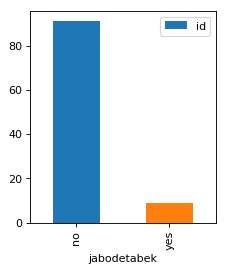

In [ ]:
df2_mudik.groupby('jabodetabek').count().plot(kind='bar',y='id')

#### Ambil data yang mudik saja

In [ ]:
df2_mudik.drop(df2_mudik.loc[(df2_mudik['jabodetabek']=='yes')].index, inplace=True)
#df2_mudik_id = df2_mudik[['id']]
#df2_mudik = pd.merge(df, df2_mudik_id, on='id',how='inner')
df2_mudik.shape

C:\Users\Adoh\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


(91, 7)

**tersisa 91 distinct id, dengan 16 row masing-masingnya**

In [ ]:
df2_mudik['jabodetabek'] = df2_mudik['lokasi_dominan'].apply(lambda x : "yes" if (x =="Jakarta Pusat" or x =="Kota Bekasi" or x =="Kabupaten Bogor" or x =="Jakarta Selatan" or x =="Jakarta Timur" or x =="Kabupaten Bekasi" or x =="Kota Depok" or x =="Kota Tangerang" or x =="Jakarta Utara"  or x =="Kota Tangerang Selatan"or x =="Kota Bogor" or x =="Jakarta Barat" or x =="Kabupaten Tangerang") else "no" )
df2_mudik.head()

C:\Users\Adoh\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,id,tanggal,lokasi_dominan,jenis_kelamin,divisi,umur,jabodetabek
249,1,2019-06-05,Kota Padang,Laki-laki,Customer Service,34,no
521,2,2019-06-05,Kota Manado,Laki-laki,Data Engineer,26,no
252,3,2019-06-05,Kota Padang,Laki-laki,Software Engineer,28,no
927,4,2019-06-05,Kota Bandar Lampung,Perempuan,Business Intelligence,21,no
1273,5,2019-06-05,Kota Yogyakarta,Perempuan,Software Engineer,21,no


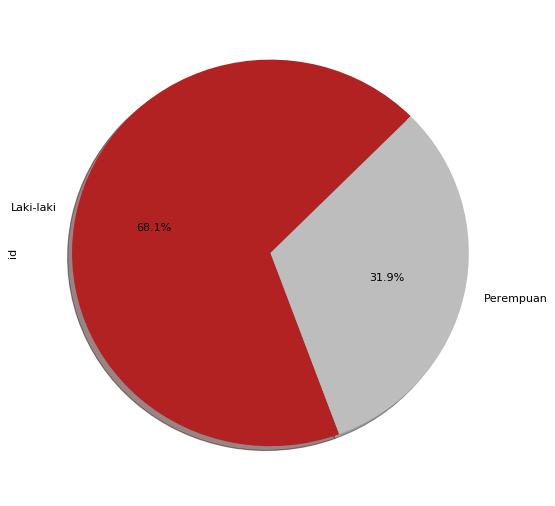

In [ ]:
color_arr = ['firebrick','#BDBDBD','#827717', '#FB8C00']
df2_mudik.groupby('jenis_kelamin').count()['id'].plot(kind='pie',colors=color_arr,autopct='%.1f%%', figsize=(8,8), shadow=True,startangle=45)

### Umur yang mudik

In [ ]:
df2_mudik.groupby('umur').count()['id']

umur
21     5
22     6
23    10
24     5
25    10
26     6
27     5
28     9
29     4
30     3
31     2
32     5
33     7
34     9
35     5
Name: id, dtype: int64

[]

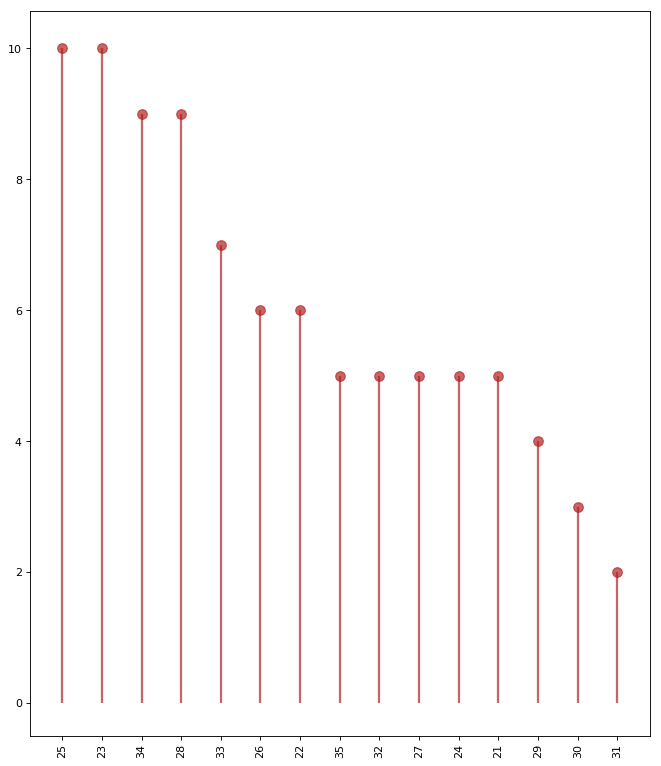

In [ ]:
#x = df2_mudik['umur'].unique().astype('str')
#y = df2_mudik.groupby('umur').count()['id'].sort_values(ascending=False)

x = df2_mudik.groupby('umur').count()['id'].sort_values(ascending=False)


plt.figure(figsize=(10,12))
plt.vlines(x.index.astype(str), ymin=0,ymax=x,color='firebrick', alpha=0.7, linewidth=2)
plt.scatter(x.index.astype(str), x, s=75, color='firebrick', alpha=0.7)
plt.xticks(rotation=90)
plt.plot()
#plt.plot(df2_mudik['umur'])


In [ ]:
df2_mudik.groupby('umur').count()['id'].sort_values()

umur
31     2
30     3
29     4
21     5
24     5
27     5
32     5
35     5
22     6
26     6
33     7
28     9
34     9
23    10
25    10
Name: id, dtype: int64

### kota tujuan mudik

In [ ]:
df2_mudik.loc[(df2_mudik['jabodetabek']=='no')]['lokasi_dominan'].unique()

array(['Kota Padang', 'Kota Manado', 'Kota Bandar Lampung',
       'Kota Yogyakarta', 'Kabupaten Sleman', 'Kota Medan',
       'Kota Semarang', 'Kabupaten Bantul', 'Kabupaten Tasikmalaya',
       'Kabupaten Lampung Selatan', 'Kota Bandung', 'Kabupaten Wonogiri',
       'Kabupaten Kebumen', 'Kota Surabaya', 'Kota Banda Aceh'],
      dtype=object)

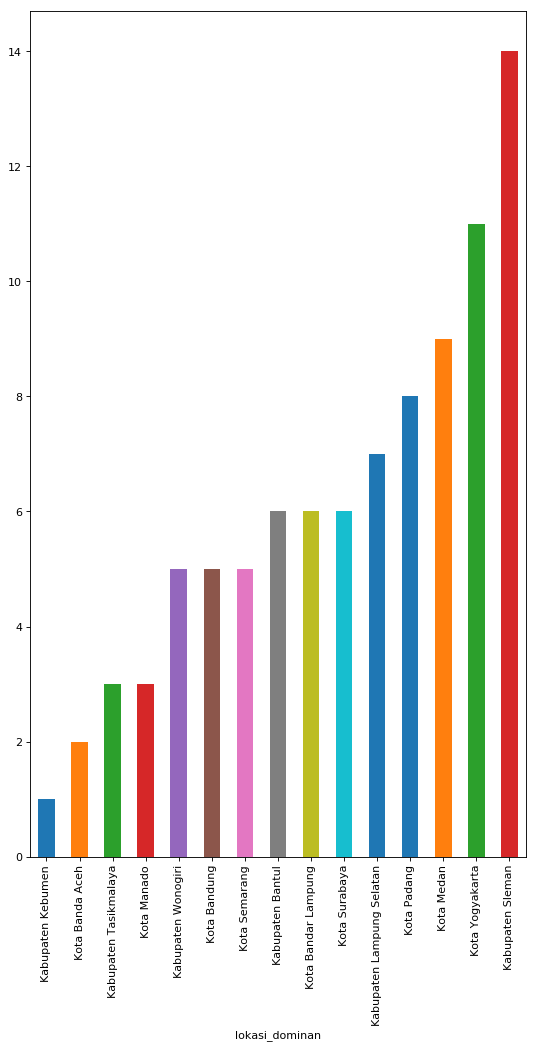

In [ ]:
df2_mudik_kota = df2_mudik[['id','lokasi_dominan']]
df2_mudik_kota.groupby('lokasi_dominan').count()['id'].sort_values().plot('bar', figsize=(8,14))

[]

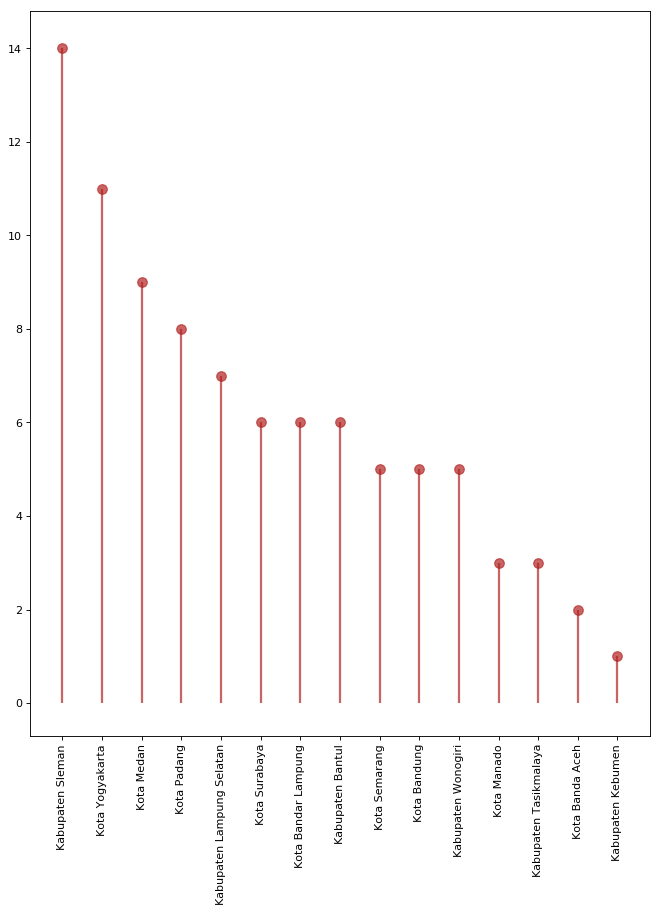

In [ ]:
x = df2_mudik.loc[(df2_mudik['jabodetabek']=='no')].groupby('lokasi_dominan').count()['id'].sort_values(ascending=False)
#y = df2_mudik.loc[(df2_mudik['jabodetabek']=='no')].groupby('lokasi_dominan').count()['id']


plt.figure(figsize=(10,12))
plt.vlines(x.index, ymin=0,ymax=x,color='firebrick', alpha=0.7, linewidth=2)
plt.scatter(x.index, x, s=75, color='firebrick', alpha=0.7)
plt.xticks(rotation=90)
plt.plot()
#plt.plot(df2_mudik['umur'])


[]

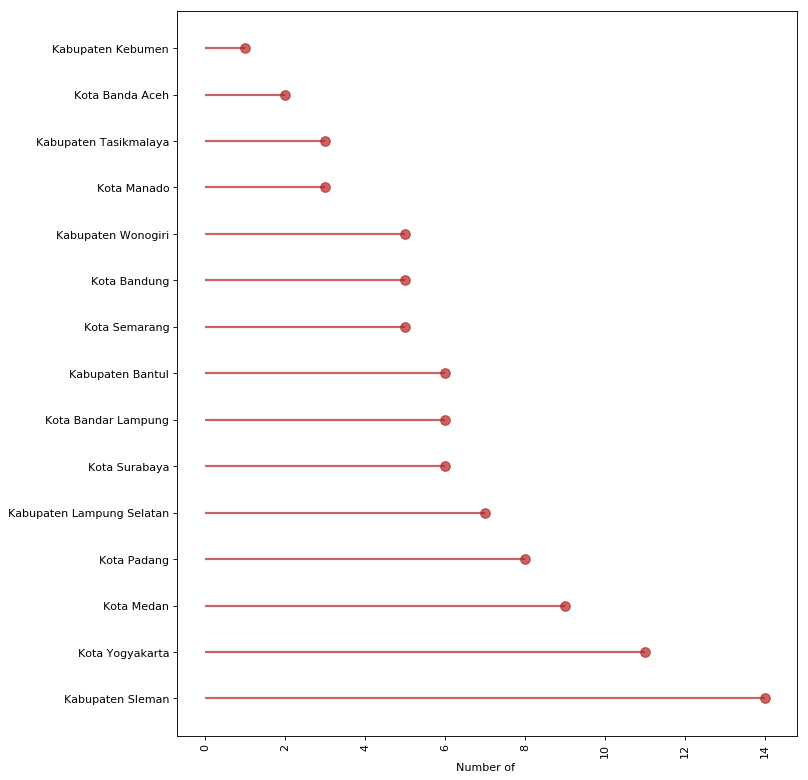

In [ ]:
#x_ax = df2_mudik.loc[(df2_mudik['jabodetabek']=='no')]['lokasi_dominan'].unique()
x_ax = df2_mudik.loc[(df2_mudik['jabodetabek']=='no')].groupby('lokasi_dominan').count()['id'].sort_values(ascending=False)


plt.figure(figsize=(10,12))
plt.hlines(y=x_ax.index, xmin=0,xmax=x_ax,color='firebrick', alpha=0.7, linewidth=2)
plt.scatter(x_ax,x_ax.index, s=75, color='firebrick', alpha=0.7)
plt.xticks(rotation=90)
plt.xlabel('Number of ')
plt.plot()
#plt.plot(df2_mudik['umur'])


### Pulau yang menjadi tujuan paling banyak

In [ ]:
def cekPulau(lokasi):
    if lokasi == 'Kota Yogyakarta' :
        return "Jawa"
    elif lokasi == 'Kota Surabaya' :
        return "Jawa"
    elif lokasi == 'Kota Semarang' :
        return "Jawa"
    elif lokasi == 'Kota Padang' :
        return "Sumatera"
    elif lokasi == 'Kota Medan':
        return "Sumatera"
    elif lokasi == 'Kota Manado' :
        return "Sulawesi"
    elif lokasi == 'Kota Bandung' :
        return "Jawa"
    elif lokasi == 'Kota Bandar Lampung' :
        return "Sumatera"
    elif lokasi == 'Kota Banda Aceh' :
        return "Jawa"
    elif lokasi == 'Kabupaten Wonogiri' :
        return "Jawa"
    elif lokasi == 'Kabupaten Tasikmalaya' :
        return "Jawa"
    elif lokasi == 'Kabupaten Sleman' :
        return "Jawa"
    elif lokasi == 'Kabupaten Lampung Selatan' :
        return "Sumatera"
    elif lokasi == 'Kabupaten Kebumen' :
        return "Jawa"
    elif lokasi == 'Kabupaten Bantul' :
        return "Jawa"
    else:
        return "none"
    

In [ ]:
df2_mudik['pulau'] = df2_mudik['lokasi_dominan'].apply(cekPulau)

C:\Users\Adoh\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df2_mudik_pulau = df2_mudik.groupby('id').tail(1)
df2_mudik_pulau.head()

,id,tanggal,lokasi_dominan,jenis_kelamin,divisi,umur,jabodetabek,pulau
249,1,2019-06-05,Kota Padang,Laki-laki,Customer Service,34,no,Sumatera
521,2,2019-06-05,Kota Manado,Laki-laki,Data Engineer,26,no,Sulawesi
252,3,2019-06-05,Kota Padang,Laki-laki,Software Engineer,28,no,Sumatera
927,4,2019-06-05,Kota Bandar Lampung,Perempuan,Business Intelligence,21,no,Sumatera
1273,5,2019-06-05,Kota Yogyakarta,Perempuan,Software Engineer,21,no,Jawa


C:\Users\Adoh\Anaconda3\lib\site-packages\pandas\plotting\_core.py:186: UserWarning: 'colors' is being deprecated. Please use 'color'instead of 'colors'
  warnings.warn(("'colors' is being deprecated. Please use 'color'"


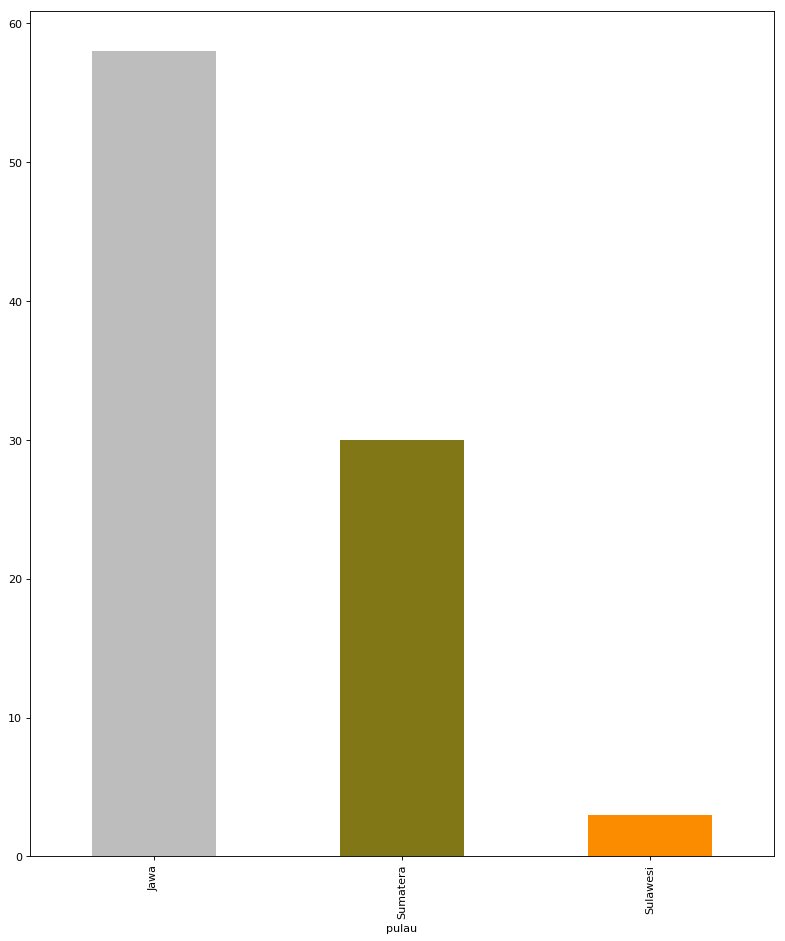

In [ ]:
df2_mudik_pulau.groupby('pulau').count()['id'].sort_values(ascending=False).plot(kind='bar', colors=color_arr[-3:], figsize=(12,14))

### Cek moda transportasi

In [ ]:
def cekModa(lokasi):
    if lokasi == 'Kota Yogyakarta' :
        return "Kereta Api"
    elif lokasi == 'Kota Surabaya' :
        return "Pesawat"
    elif lokasi == 'Kota Semarang' :
        return "Kereta Api"
    elif lokasi == 'Kota Padang' :
        return "Pesawat"
    elif lokasi == 'Kota Medan':
        return "Pesawat"
    elif lokasi == 'Kota Manado' :
        return "Pesawat"
    elif lokasi == 'Kota Bandung' :
        return "Kereta Api"
    elif lokasi == 'Kota Bandar Lampung' :
        return "Pesawat"
    elif lokasi == 'Kota Banda Aceh' :
        return "Pesawat"
    elif lokasi == 'Kabupaten Wonogiri' :
        return "Kereta Api"
    elif lokasi == 'Kabupaten Tasikmalaya' :
        return "Bus"
    elif lokasi == 'Kabupaten Sleman' :
        return "Kereta Api"
    elif lokasi == 'Kabupaten Lampung Selatan' :
        return "Bus"
    elif lokasi == 'Kabupaten Kebumen' :
        return "Kereta Api"
    elif lokasi == 'Kabupaten Bantul' :
        return "Kereta Api"
    else:
        return "none"

In [ ]:
df2_mudik['moda'] = df2_mudik['lokasi_dominan'].apply(cekModa)

C:\Users\Adoh\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df2_mudik_moda = df2_mudik[['id','moda']]
df2_mudik_moda.shape

(91, 2)

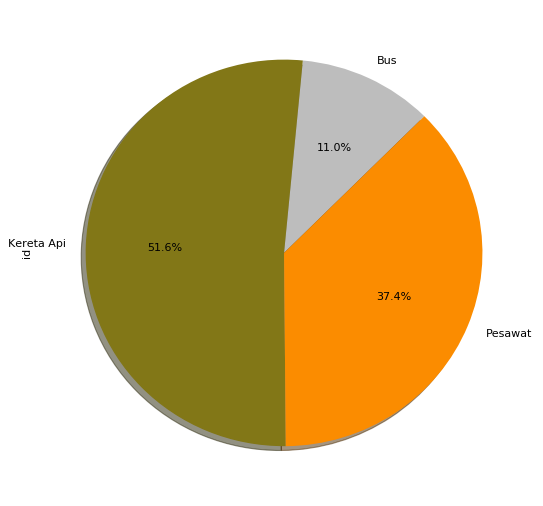

In [ ]:
df2_mudik_moda.groupby('moda').count()['id'].plot(kind='pie',colors=color_arr[1:],autopct='%.1f%%', figsize=(8,8), shadow=True,startangle=45)

In [ ]:
df2.shape

(1600, 7)

### cari tau tanggal mudik 

In [ ]:
df2_mudik_tanggal = pd.merge(df2_mudik[['id']], df2, on='id',how='inner')
df2_mudik_tanggal.sort_values(by=['id','tanggal'], inplace=True)

In [ ]:
df2_mudik_tanggal = df2_mudik_tanggal.groupby(['id','lokasi_dominan','jabodetabek']).head(1)
df2_mudik_tanggal.drop(df2_mudik_tanggal.loc[(df2_mudik_tanggal['jabodetabek']=='yes')].index, inplace=True)

In [ ]:
df2_mudik_tanggal

,id,tanggal,lokasi_dominan,jenis_kelamin,divisi,umur,jabodetabek
5,1,2019-05-26,Kota Medan,Laki-laki,Customer Service,34,no
7,1,2019-05-28,Kota Padang,Laki-laki,Customer Service,34,no
25,2,2019-05-30,Kota Manado,Laki-laki,Data Engineer,26,no
45,3,2019-06-03,Kota Padang,Laki-laki,Software Engineer,28,no
58,4,2019-05-31,Kota Bandar Lampung,Perempuan,Business Intelligence,21,no
61,4,2019-06-03,Kabupaten Lampung Selatan,Perempuan,Business Intelligence,21,no
73,5,2019-05-30,Kota Bandung,Perempuan,Software Engineer,21,no
74,5,2019-05-31,Kota Yogyakarta,Perempuan,Software Engineer,21,no
87,6,2019-05-28,Kabupaten Wonogiri,Laki-laki,Business Intelligence,28,no
90,6,2019-05-31,Kabupaten Sleman,Laki-laki,Business Intelligence,28,no


In [ ]:
df2_mudik_tanggal = pd.merge(df2_mudik_tanggal, df2_mudik_kota, on=['id','lokasi_dominan'], how='inner')

In [ ]:
df2_mudik_tanggal.head()

,id,tanggal,lokasi_dominan,jenis_kelamin,divisi,umur,jabodetabek
0,1,2019-05-28,Kota Padang,Laki-laki,Customer Service,34,no
1,2,2019-05-30,Kota Manado,Laki-laki,Data Engineer,26,no
2,3,2019-06-03,Kota Padang,Laki-laki,Software Engineer,28,no
3,4,2019-05-31,Kota Bandar Lampung,Perempuan,Business Intelligence,21,no
4,5,2019-05-31,Kota Yogyakarta,Perempuan,Software Engineer,21,no


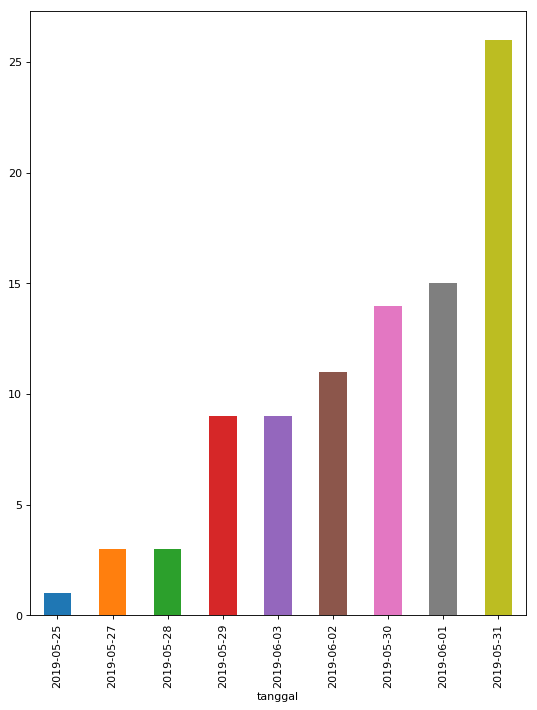

In [ ]:
df2_mudik_tanggal['tanggal'] = df2_mudik_tanggal['tanggal'].astype(str)
df2_mudik_tanggal.groupby('tanggal').count()['id'].sort_values().plot('bar',figsize=(8,10))

*** Sesuai dengan prediksi DISHUB, bahwa PEAK akan terjadi pada tanggal 31 Mei 2019 ***

### amati variable lainnya

**1. Korelasi antar usia dan divisi**

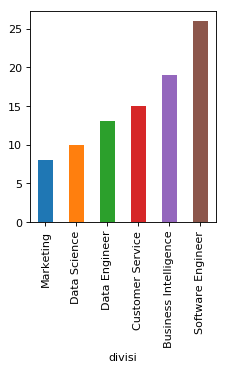

In [ ]:
df2_mudik.groupby('divisi').count()['id'].sort_values().plot('bar')

In [ ]:
df2_mudik_divisi = df2_mudik.groupby('divisi').count()
df2_mudik_divisi

,id,tanggal,lokasi_dominan,jenis_kelamin,umur,jabodetabek,pulau,moda
divisi,,,,,,,,
Business Intelligence,19,19,19,19,19,19,19,19
Customer Service,15,15,15,15,15,15,15,15
Data Engineer,13,13,13,13,13,13,13,13
Data Science,10,10,10,10,10,10,10,10
Marketing,8,8,8,8,8,8,8,8
Software Engineer,26,26,26,26,26,26,26,26


In [ ]:
df3_divisi = []
for x, row in df2_mudik.iterrows():
    n = 0
    n  = df2_mudik.loc[(df2_mudik['umur']==row['umur']) & (df2_mudik['divisi']==row['divisi'])]['id'].count()
    df3_divisi.append([row['umur'], row['divisi'], n])
    #print(n)
#df3 = pd.concat(df3, ignore_index=False)

In [ ]:
df3_divisi = pd.DataFrame(df3_divisi)

In [ ]:
df3_divisi.shape

(91, 3)

In [ ]:
df3_divisi.rename({0:'umur',1:'divisi', 2:'N'},axis=1, inplace=True)

In [ ]:
df3_divisi.head()

,umur,divisi,N
0,34,Customer Service,4
1,26,Data Engineer,1
2,28,Software Engineer,2
3,21,Business Intelligence,2
4,21,Software Engineer,2


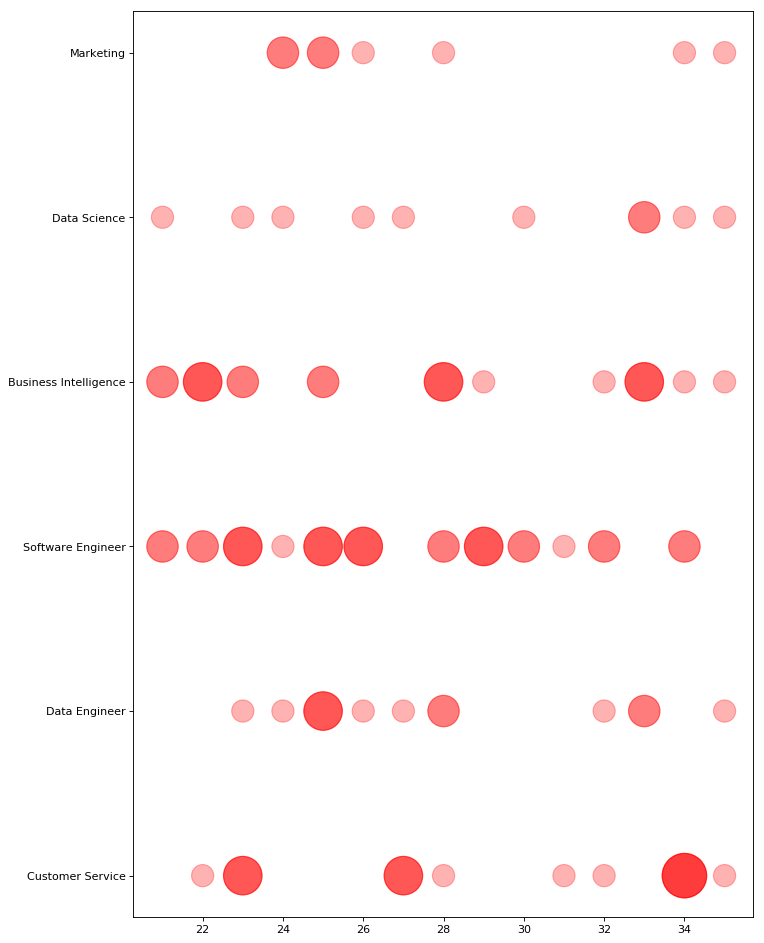

In [ ]:
import numpy as np

plt.figure(figsize=(10,15))
plt.scatter(x=df3_divisi['umur'], y=df3_divisi['divisi'], s=df3_divisi['N']*400, c='red',alpha=0.3, cmap='viridis')

**Bisa dilihat bahwa sebaran usia antar divisi merata**

 **2. Gender per divisi**

In [ ]:
df3_gender = []
for x, row in df2_mudik.iterrows():
    n = 0
    n  = df2_mudik.loc[(df2_mudik['jenis_kelamin']==row['jenis_kelamin']) & (df2_mudik['divisi']==row['divisi'])]['id'].count()
    df3_gender.append([row['jenis_kelamin'], row['divisi'], n])
    #print(n)

In [ ]:
df3_gender = pd.DataFrame(df3_gender, columns=['gender','divisi','N'])

In [ ]:
df3_gender.head()

,gender,divisi,N
0,Laki-laki,Customer Service,12
1,Laki-laki,Data Engineer,10
2,Laki-laki,Software Engineer,18
3,Perempuan,Business Intelligence,5
4,Perempuan,Software Engineer,8


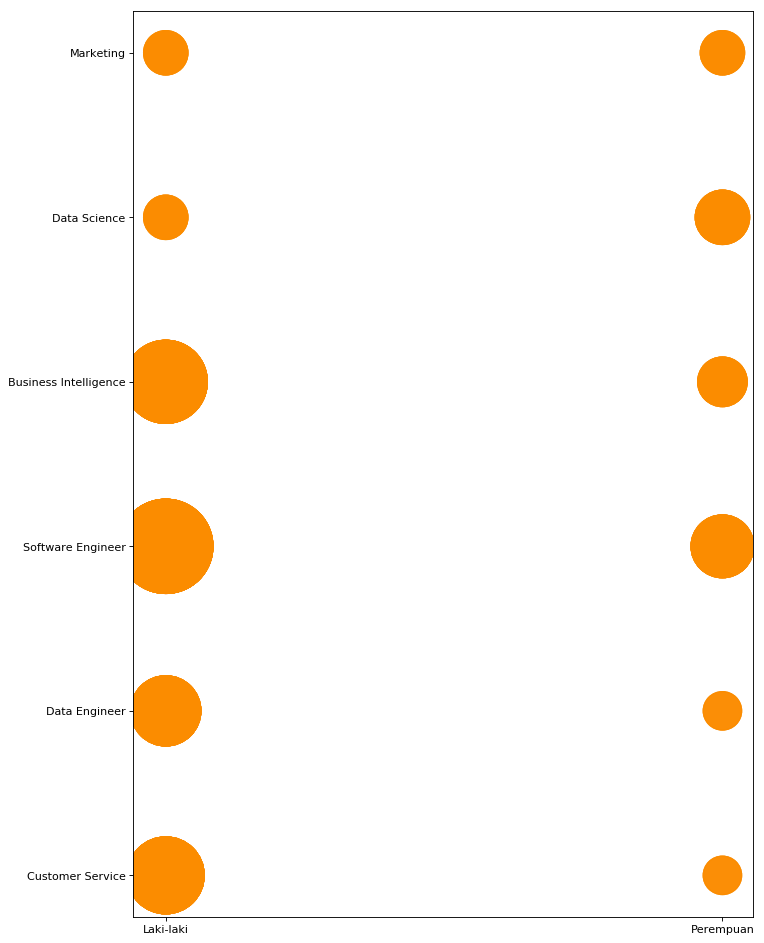

In [ ]:
plt.figure(figsize=(10,15))
plt.scatter(x=df3_gender['gender'], y=df3_gender['divisi'], s=df3_gender['N']*400, c=color_arr[3],alpha=0.7, cmap='viridis')

**Jumlah staff laki-laki 2 kali jumlah staff perempuan, sehingga terlihat mendominasi semua divisi. Namun pada divisi data science jumlah staff perempuan dan laki-laki sebanding**